In [6]:
from datasets import load_from_disk
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import torch

In [2]:
dataset = load_from_disk('/mnt/ceph/users/dmohan/dreams/data/gzevo/train')
dataset.set_format('torch')
print(dataset[0]['image'].shape)



Loading dataset from disk:   0%|          | 0/30 [00:00<?, ?it/s]

torch.Size([3, 424, 424])


In [3]:
dataloader = DataLoader(dataset, batch_size=4, num_workers=1)
for batch in dataloader:
    print(batch.keys()) 
    # the image key, plus a key counting the volunteer votes for each answer 
    # (e.g. smooth-or-featured-gz2_smooth)
    print(batch['image'].shape)
    break

dict_keys(['image', 'id_str', 'dataset_name', 'ra', 'dec', 'smooth-or-featured-gz2_smooth', 'smooth-or-featured-gz2_smooth_fraction', 'smooth-or-featured-gz2_total-votes', 'smooth-or-featured-gz2_featured-or-disk', 'smooth-or-featured-gz2_featured-or-disk_fraction', 'smooth-or-featured-gz2_artifact', 'smooth-or-featured-gz2_artifact_fraction', 'disk-edge-on-gz2_yes', 'disk-edge-on-gz2_yes_fraction', 'disk-edge-on-gz2_total-votes', 'disk-edge-on-gz2_no', 'disk-edge-on-gz2_no_fraction', 'has-spiral-arms-gz2_yes', 'has-spiral-arms-gz2_yes_fraction', 'has-spiral-arms-gz2_total-votes', 'has-spiral-arms-gz2_no', 'has-spiral-arms-gz2_no_fraction', 'bar-gz2_yes', 'bar-gz2_yes_fraction', 'bar-gz2_total-votes', 'bar-gz2_no', 'bar-gz2_no_fraction', 'bulge-size-gz2_dominant', 'bulge-size-gz2_dominant_fraction', 'bulge-size-gz2_total-votes', 'bulge-size-gz2_obvious', 'bulge-size-gz2_obvious_fraction', 'bulge-size-gz2_just-noticeable', 'bulge-size-gz2_just-noticeable_fraction', 'bulge-size-gz2_no', 

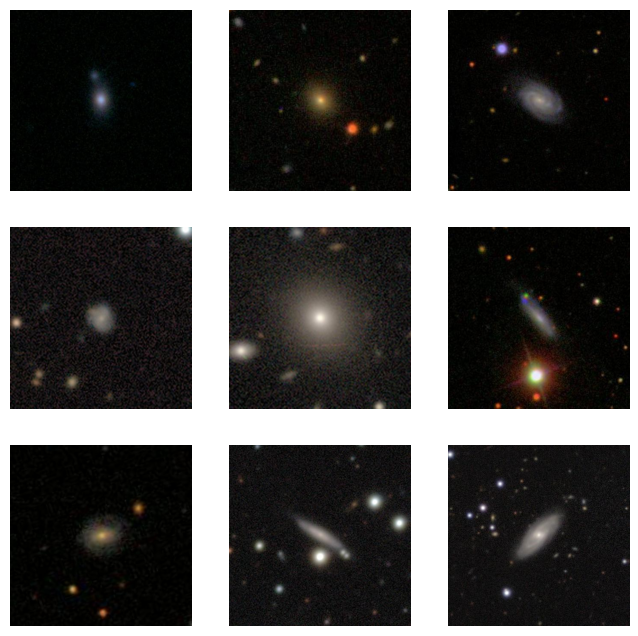

In [12]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img = dataset[sample_idx]['image']
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.T.squeeze())
plt.show()